# Convolutional Neural Nets

This notebook contains an example application of a convolutional neural net to the MNIST digits dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

from keras.utils import np_utils
from keras import backend as K

In [2]:
import tensorflow as tf
import tensorflow.keras.backend as tfback
print("tf.__version__ is", tf.__version__)
print("tf.keras.__version__ is:", tf.keras.__version__)

def _get_available_gpus():
    """Get a list of available gpu devices (formatted as strings).

    # Returns
        A list of available GPU devices.
    """
    #global _LOCAL_DEVICES
    if tfback._LOCAL_DEVICES is None:
        devices = tf.config.list_logical_devices()
        tfback._LOCAL_DEVICES = [x.name for x in devices]
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]

tfback._get_available_gpus = _get_available_gpus

tf.__version__ is 2.9.2
tf.keras.__version__ is: 2.9.0


## Import the Data

Keras expects the channels in the image data in the first column. 

In [3]:
K.set_image_data_format("channels_last")
np.random.seed(0)

# Image Dimensions
channels = 1
height = 28
width = 28

# Load Training and Test Data from MNIST.
(data_train, target_train), (data_test, target_test) = mnist.load_data()

data_train[0].shape

11490434/11490434 [==============================] - 0s 0us/step


(28, 28)

Let's look at an example image.

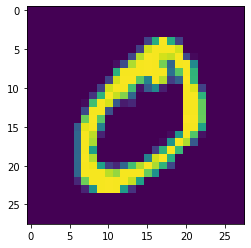

In [5]:
plt.imshow(data_train[1], origin='upper', interpolation='nearest') 
plt.show()

The target matrix has the labels for these images.

In [7]:
target_train[1]

0

## Feature Creation

We reshape the data into an array of 3D tensors and normalize each element so that each pixel value is between 0 and 255.

In [8]:
# Reshape the image data into features.
data_train = data_train.reshape(data_train.shape[0], height, width, channels)
data_test = data_test.reshape(data_test.shape[0], height, width, channels)

# Normalize the features
features_train = data_train / 255
features_test = data_test / 255

Each potential label/class will be an output node in the neural network and so each possible class needs to be mapped to a value for each target label. We perform this operation with a one-hot encoding of the labels.

In [9]:
# One-Hot Encode Target
target_train = np_utils.to_categorical(target_train)
target_test = np_utils.to_categorical(target_test)
number_of_classes = target_test.shape[1]

## Build the Neural Network

In [10]:
network = Sequential()

# CNN:
# 64 filters
# 5x5 window
# ReLu Activation
network.add(Conv2D(filters=64,
                  kernel_size=(5, 5),
                  input_shape=(height, width, channels),
                  activation='relu'))

# Pooling with a 2x2 window
network.add(MaxPooling2D(pool_size=(2,2)))

# Dropout Layer
network.add(Dropout(0.5))

# Flattening Layer
network.add(Flatten())

# Fully Connected Layer
network.add(Dense(128, activation='relu'))

# Dropout Layer
network.add(Dropout(0.5))

# Fully Connected Layer with softmax.
network.add(Dense(number_of_classes, activation='softmax'))

Compile and train the neural network.

In [11]:
network.compile(loss="categorical_crossentropy",
                optimizer="rmsprop",
                metrics=["accuracy"])

In [14]:
history = network.fit(features_train,
                       target_train,
                       epochs=5,
                       verbose=0,
                       batch_size=1000,
                       validation_data=(features_test,target_test))

## Evaluate the Neural Network

In [15]:
loss, accuracy = network.evaluate(features_train, target_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = network.evaluate(features_test, target_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9914
Testing Accuracy:  0.9870


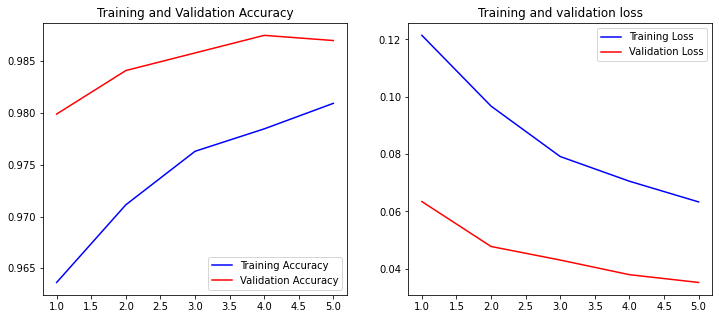

In [16]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training Accuracy')
    plt.plot(x, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training Loss')
    plt.plot(x, val_loss, 'r', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()
    
plot_history(history)